## Importing all importand libraries

# Task :- EDA retail level-Beginner

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv('Task_3-SampleSuperstore.csv')
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [34]:
# df = df.drop('Postal Code',axis=0)

In [9]:
df.duplicated().sum()

50

In [11]:
df = df.drop_duplicates()

In [12]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [13]:
df.describe(include = "O")

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9944,9944,9944,9944,9944,9944,9944,9944
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5930,5160,9944,906,1980,3177,5986,1518


In [14]:
df = df.drop('Country',axis=1)

array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Quantity'}>],
       [<AxesSubplot:title={'center':'Discount'}>,
        <AxesSubplot:title={'center':'Profit'}>]], dtype=object)

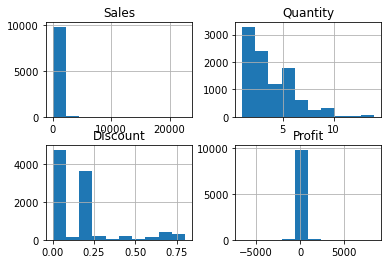

In [18]:
df.hist() 

In [19]:
plt.show()

In [20]:
print(df.skew())

Sales       12.946427
Quantity     1.273812
Discount     1.681206
Profit       7.541727
dtype: float64


C:\Users\vidne\AppData\Local\Temp/ipykernel_9424/1926848427.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.skew())


In [21]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


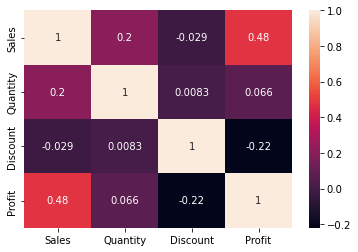

In [22]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [23]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [24]:
df_cat = df.select_dtypes(include='O')

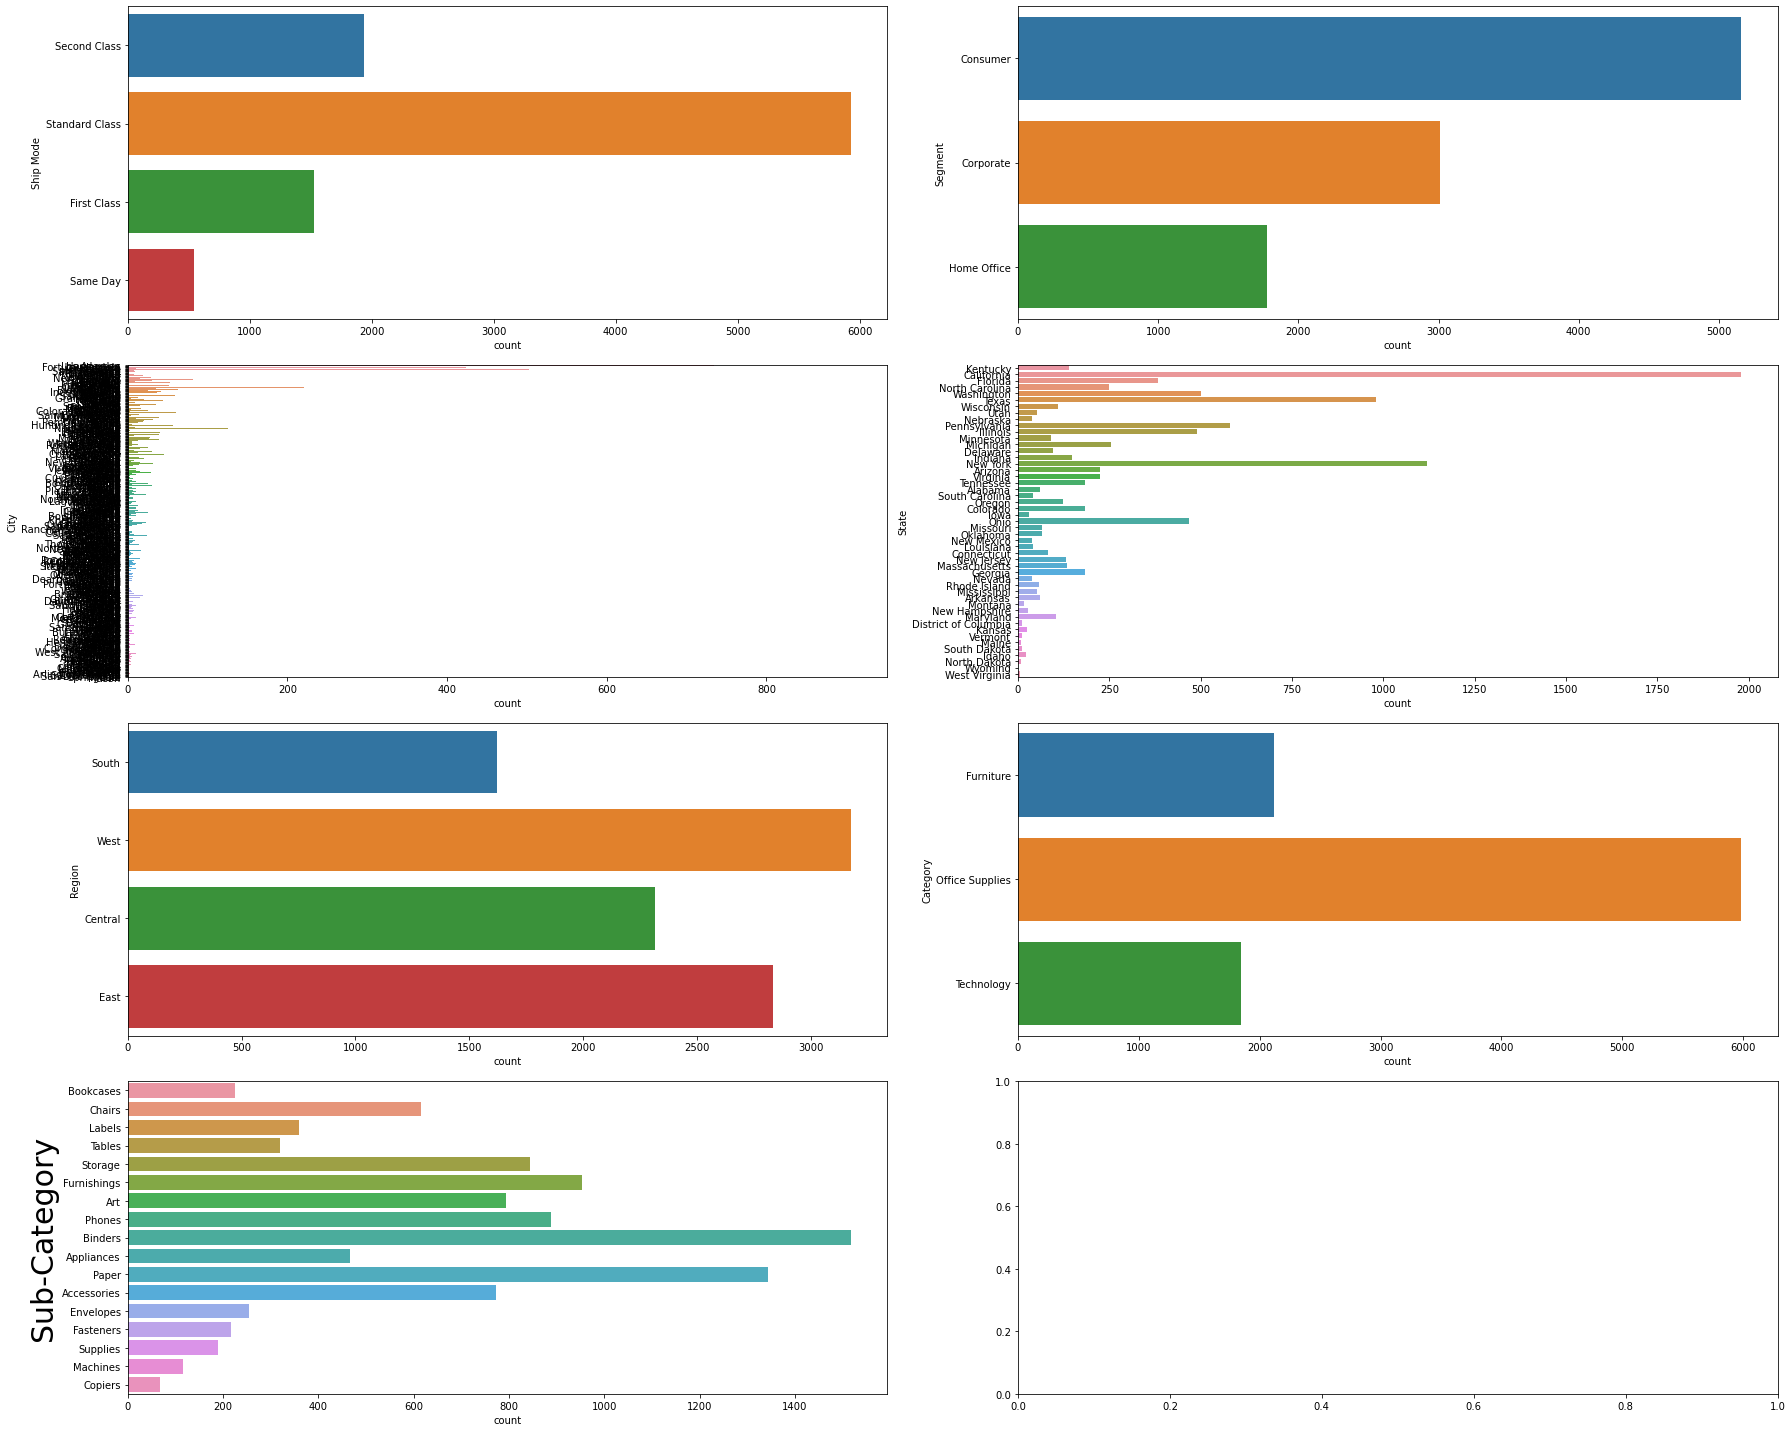

In [28]:
fig, ax = plt.subplots(4, 2, figsize=(25, 20))

# plot a count plot for all the categorical variables
for variable, subplot in zip(df_cat, ax.flatten()):
        countplot = sns.countplot(y=df[variable], ax=subplot )
       
# set the y-axis labels 
# fontsize = 30: sets the font size to 30
countplot.set_ylabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show()

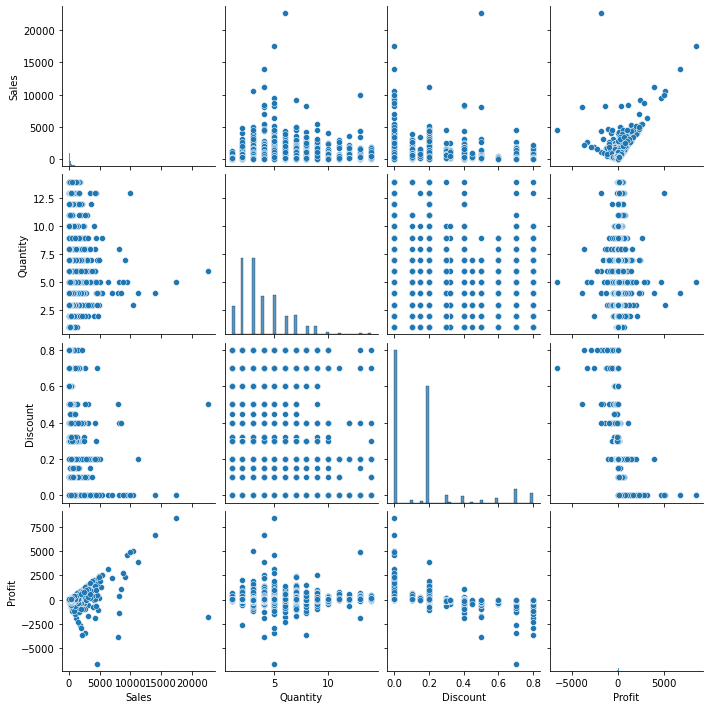

In [29]:
# Pairwise relation between all the numeric variables
sns.pairplot(df)
plt.show()

<AxesSubplot:xlabel='Region'>

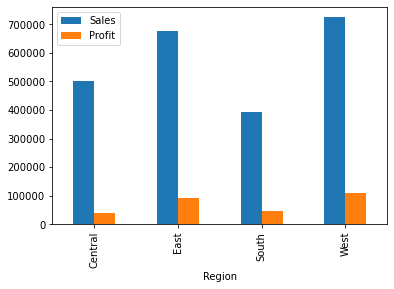

In [30]:
df.groupby(['Region'])[['Sales','Profit']].sum().plot(kind='bar')

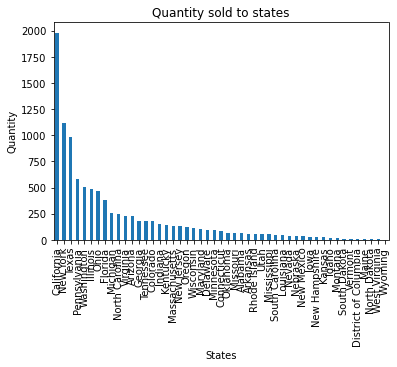

In [31]:
df_state_quantity=df.groupby(['State'])['Quantity'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Quantity sold to states')
plt.xlabel('States')
plt.ylabel('Quantity')
plt.show()

C:\Users\vidne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


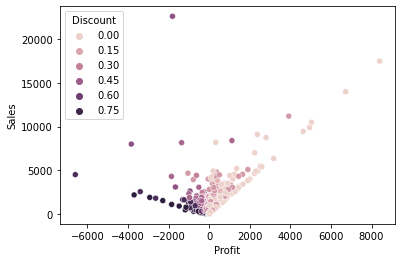

In [32]:
sns.scatterplot(df['Profit'],df['Sales'],hue=df['Discount'])
plt.show()

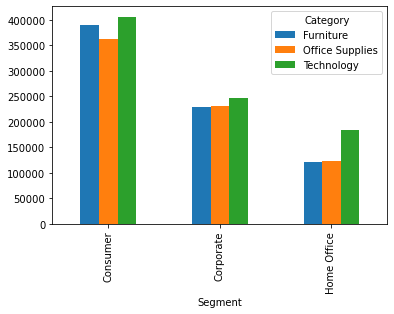

In [33]:
pd.crosstab(index=df['Segment'],columns=df['Category'],values=df['Sales'],aggfunc='sum').plot(kind='bar')
plt.show()